In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
links=pd.read_csv(r"C:\Users\SAMYA PUNTIKURA\Downloads\movie_data (1)\links.csv")
ratings=pd.read_csv(r"C:\Users\SAMYA PUNTIKURA\Downloads\movie_data (1)\ratings.csv")
tags=pd.read_csv(r"C:\Users\SAMYA PUNTIKURA\Downloads\movie_data (1)\tags.csv")
movies=pd.read_csv(r"C:\Users\SAMYA PUNTIKURA\Downloads\movie_data (1)\movies.csv")

In [3]:
movies.shape

(9742, 3)

In [4]:
ratings.shape


(100836, 4)

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings['userId'].nunique()

610

In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
ratings['rating'].max()

5.0

In [14]:
 ratings['movieId'].value_counts().idxmax()

356

In [16]:
ratings['movieId'].value_counts().max()

329

In [19]:
ratings.loc[ratings["movieId"]==356]

,userId,movieId,rating,timestamp
20,1,356,4.0,964980962
725,6,356,5.0,845553200
880,7,356,5.0,1106635915
1053,8,356,3.0,839463527
1120,10,356,3.5,1455301685
...,...,...,...,...
97154,605,356,3.0,1277097509
97428,606,356,4.0,1171231370
98735,608,356,3.0,1117162603
99514,609,356,4.0,847220869


In [20]:
movies.loc[movies['movieId']==356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [24]:
 movie_id=movies[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]

In [25]:
tags[tags['movieId'] ==movie_id]['tag'].unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

In [27]:
ter_id=movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]


In [32]:
terminator_ratings=ratings[ratings['movieId'] == ter_id]

In [35]:
round(terminator_ratings['rating'].mean(),2)

3.97

In [36]:
fight_club_movie_id = movies[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]


In [37]:
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]

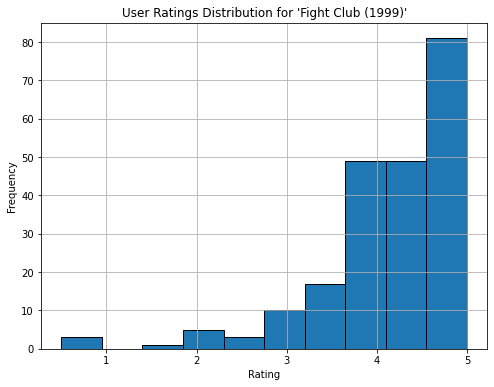

In [40]:
plt.figure(figsize=(8, 6))
plt.hist(fight_club_ratings['rating'], bins=10, edgecolor='black')
plt.title("User Ratings Distribution for 'Fight Club (1999)'")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [41]:
grouped_ratings_df = ratings.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()

In [42]:
merged_df = pd.merge(movies, grouped_ratings_df, on='movieId', how='inner')

In [43]:
filtered_df = merged_df[merged_df['rating_count'] > 50]

In [44]:
most_popular_movie = filtered_df.loc[filtered_df['rating_mean'].idxmax()]

In [45]:
most_popular_movie['title']

'Shawshank Redemption, The (1994)'

In [47]:
round(most_popular_movie['rating_mean'],2)

4.43

In [48]:
most_popular_movie['rating_count']

317

In [49]:
top_movies_by_ratings = filtered_df.sort_values(by='rating_count', ascending=False).head(5)

In [50]:
top_movies_by_ratings

,movieId,title,genres,rating_count,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [51]:
top_movies_by_ratings[['title', 'rating_count']]

,title,rating_count
314,Forrest Gump (1994),329
277,"Shawshank Redemption, The (1994)",317
257,Pulp Fiction (1994),307
510,"Silence of the Lambs, The (1991)",279
1938,"Matrix, The (1999)",278


In [52]:
sci_fi_movies_df = filtered_df[filtered_df['genres'].str.contains('Sci-Fi', na=False)]

In [53]:
sorted_sci_fi_movies = sci_fi_movies_df.sort_values(by='rating_count', ascending=False)

In [54]:
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2] 

In [56]:
third_most_popular_sci_fi_movie['title']

'Jurassic Park (1993)'

In [57]:
third_most_popular_sci_fi_movie['rating_count']

238

In [58]:
filtered_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [60]:
movies_with_links = pd.merge(filtered_df, links, on='movieId', how='inner')

In [61]:
movies_with_links 

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [62]:
import requests
from bs4 import BeautifulSoup

def get_imdb_reviews(imdb_id):
    url = f"https://www.imdb.com/title/{imdb_id}/reviews?ref_=tt_ql_3"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    reviews = []
    for review in soup.find_all('div', class_='text show-more__control'):
        reviews.append(review.get_text())

    return reviews

# Example for scraping reviews for the first movie
imdb_id = movies_with_links.iloc[0]['imdbId']
reviews = get_imdb_reviews(imdb_id)
print(f"Reviews for IMDb ID {imdb_id}:")
for review in reviews:
    print(review)

Reviews for IMDb ID 114709:


In [63]:
def get_imdb_rating(imdb_id):
    url = f"https://www.imdb.com/title/{imdb_id}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the IMDb rating
    rating_div = soup.find('span', itemprop='ratingValue')
    if rating_div:
        rating = float(rating_div.get_text())
        return rating
    return None

# Create a DataFrame to store IMDb ratings
ratings_df = []

# Scrape IMDb ratings for each movie
for _, row in movies_with_links.iterrows():
    imdb_id = row['imdbId']
    movie_id = row['movieId']
    rating = get_imdb_rating(imdb_id)
    if rating:
        ratings_df.append({'movieId': movie_id, 'imdb_rating': rating})

ratings_df = pd.DataFrame(ratings_df)

# Find the movieId with the highest IMDb rating
highest_rated_movie = ratings_df.loc[ratings_df['imdb_rating'].idxmax()]
highest_rated_movie_id = highest_rated_movie['movieId']

print(f"Movie ID with the highest IMDb rating: {highest_rated_movie_id}")

KeyError: 'imdb_rating'

In [64]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [65]:
print(ratings_df.columns)

RangeIndex(start=0, stop=0, step=1)


In [68]:
print(sci_fi_ratings_df.head())

NameError: name 'sci_fi_ratings_df' is not defined

In [67]:
#sci_fi_movies_df = movies_with_links[movies_with_links['genres'].str.contains('Sci-Fi', na=False)]

In [69]:
def get_imdb_rating(imdb_id):
    url = f"https://www.imdb.com/title/{imdb_id}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    rating_div = soup.find('span', itemprop='ratingValue')
    if rating_div:
        return float(rating_div.get_text())
    return None

# Create a DataFrame to store IMDb ratings for Sci-Fi movies
sci_fi_ratings_df = []

# Scrape IMDb ratings for each Sci-Fi movie
for _, row in sci_fi_movies_df.iterrows():
    imdb_id = row['imdbId']
    movie_id = row['movieId']
    rating = get_imdb_rating(imdb_id)
    if rating:
        sci_fi_ratings_df.append({'movieId': movie_id, 'imdb_rating': rating})

sci_fi_ratings_df = pd.DataFrame(sci_fi_ratings_df)

# Debug: Check column names
print(sci_fi_ratings_df.columns)

# Find the movieId with the highest IMDb rating among Sci-Fi movies
if 'imdb_rating' in sci_fi_ratings_df.columns:
    highest_rated_sci_fi_movie = sci_fi_ratings_df.loc[sci_fi_ratings_df['imdb_rating'].idxmax()]
    highest_rated_sci_fi_movie_id = highest_rated_sci_fi_movie['movieId']

    print(f"Movie ID of the Sci-Fi movie with the highest IMDb rating: {highest_rated_sci_fi_movie_id}")
else:
    print("The column 'imdb_rating' does not exist in the DataFrame.")

RangeIndex(start=0, stop=0, step=1)
The column 'imdb_rating' does not exist in the DataFrame.


In [70]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [74]:
movies_with_links = pd.merge(filtered_df, links, on='movieId', how='inner')

In [75]:
movies_with_links

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [76]:
def get_imdb_rating(imdb_id):
    url = f"https://www.imdb.com/title/{imdb_id}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    rating_div = soup.find('span', itemprop='ratingValue')
    if rating_div:
        return float(rating_div.get_text())
    return None

# Create a DataFrame to store IMDb ratings
ratings_df = []

# Scrape IMDb ratings for each movie
for _, row in movies_with_links.iterrows():
    imdb_id = row['imdbId']
    movie_id = row['movieId']
    rating = get_imdb_rating(imdb_id)
    if rating:
        ratings_df.append({'movieId': movie_id, 'imdb_rating': rating})

ratings_df = pd.DataFrame(ratings_df)

# Find the movieId with the highest IMDb rating
if 'imdb_rating' in ratings_df.columns:
    highest_rated_movie = ratings_df.loc[ratings_df['imdb_rating'].idxmax()]
    highest_rated_movie_id = highest_rated_movie['movieId']
    print(f"Movie ID with the highest IMDb rating: {highest_rated_movie_id}")
else:
    print("The column 'imdb_rating' does not exist in the DataFrame.")

The column 'imdb_rating' does not exist in the DataFrame.


In [77]:
for _, row in movies_with_links.iterrows():
    imdb_id = row['imdbId']
    movie_id = row['movieId']

In [78]:
imdb_id

1431045

In [79]:
movie_id

122904

In [85]:
def get_imdb_rating(imdb_id):
    url = f"https://www.imdb.com/title/{imdb_id}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    rating_div = soup.find('span', itemprop='ratingValue')
    if rating_div:
        return float(rating_div.get_text())
    

In [86]:
ratings_df = []

In [87]:
rating = get_imdb_rating(imdb_id)

In [88]:
rating 

In [89]:
sci_fi_movies_df = movies_with_links[movies_with_links['genres'].str.contains('Sci-Fi', na=False)]

In [90]:
def get_imdb_rating(imdb_id):
    url = f"https://www.imdb.com/title/{imdb_id}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    rating_div = soup.find('span', itemprop='ratingValue')
    if rating_div:
        return float(rating_div.get_text())
    return None

# Create a DataFrame to store IMDb ratings for Sci-Fi movies
sci_fi_ratings_df = []

# Scrape IMDb ratings for each Sci-Fi movie
for _, row in sci_fi_movies_df.iterrows():
    imdb_id = row['imdbId']
    movie_id = row['movieId']
    rating = get_imdb_rating(imdb_id)
    if rating:
        sci_fi_ratings_df.append({'movieId': movie_id, 'imdb_rating': rating})

sci_fi_ratings_df = pd.DataFrame(sci_fi_ratings_df)

# Find the movieId with the highest IMDb rating among Sci-Fi movies
if 'imdb_rating' in sci_fi_ratings_df.columns:
    highest_rated_sci_fi_movie = sci_fi_ratings_df.loc[sci_fi_ratings_df['imdb_rating'].idxmax()]
    highest_rated_sci_fi_movie_id = highest_rated_sci_fi_movie['movieId']
    print(f"Movie ID of the Sci-Fi movie with the highest IMDb rating: {highest_rated_sci_fi_movie_id}")
else:
    print("The column 'imdb_rating' does not exist in the DataFrame.")

The column 'imdb_rating' does not exist in the DataFrame.


In [91]:
sci_fi_movies_df 

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
12,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051,114746,63.0
30,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193,112715,10329.0
35,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,113481,9886.0
36,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355,113492,9482.0
38,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043,114898,9804.0
...,...,...,...,...,...,...,...
427,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565,848228,24428.0
428,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185,1392170,70160.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [92]:
for _, row in sci_fi_movies_df.iterrows():
    imdb_id = row['imdbId']
    movie_id = row['movieId']

In [93]:
 movie_id

122904